# Homework 2: Solutions

### **Conceptual:** Short answer questions. Be concise.

---
1. How does knowing data type (e.g., qualitative vs. quantitative) provide insights into the type of distribution a random variable comes from?

**Answer:** Knowing the data type of a random variable tells you the class or family of distributions that it comes from (or does not come from).

---
2. What exactly does it mean to say that a data point is a "random variable is normal with a mean of 100 and standard deviation of 15"?

**Answer:** This means that the data point comes from a normal Gaussian distribution best described by the parameters mean = 100 and standard deviation of 15. It defines its probabilistic properties.

---
### **Applied:** Show your code & plots

---


The *central limit theorem* states that when independent random variables are added together, they sum to a normal distribution even if the original variables themselves are not normally distributed. For your homework test this assumption.

3. Using the *runif* function, run three experiments by simulating the outcomes of rolling a single, six-sided die. Show the distribution of each experiment. Show how the simulated means compare to the expected mean of a fair roll.
        	a) Exp 1: 10 independent throws
        	b) Exp 2: 1,000 independent throws
        	c) Exp 3: 10,000 independent throws


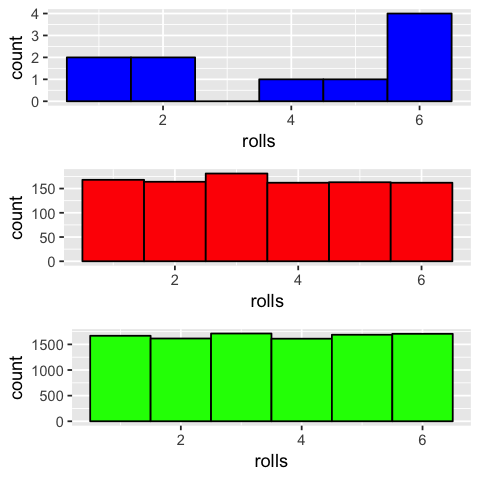

In [1]:
# -------------------------------
# Question 3
# -------------------------------
options(repr.plot.width=4, repr.plot.height=4)
library(ggplot2)
library("gridExtra")

# a) Exp 1: 10 independent throws
n = 10
dice = data.frame(rolls = ceiling(runif(n, min=0, max=6)))
p1 = ggplot(dice, aes(x=rolls)) + geom_histogram(fill='blue',color='black',binwidth=1)

# b) Exp 2: 1,000 independent throws
n = 1000
dice = data.frame(rolls = ceiling(runif(n, min=0, max=6)))
p2 = ggplot(dice, aes(x=rolls)) + geom_histogram(fill='red',color='black',binwidth=1)

# c) Exp 3: 10,000 independent throws
n = 10000
dice = data.frame(rolls = ceiling(runif(n, min=0, max=6)))
p3 = ggplot(dice, aes(x=rolls)) + geom_histogram(fill='green',color='black',binwidth=1)

# Plot in a single column
grid.arrange(p1, p2, p3, nrow = 3, ncol = 1)


---
4. Instead of rolling one die, run a set of experiments reporting the outcomes of rolling multiple dice at the same time.
        	a) Exp 1: 10,000 throws, 1 die
        	b) Exp 2: 10,000 throws, 2 dice
        	c) Exp 3: 10,000 throws, 3 dice
        	d) Exp 4; 10,000 throws, 6 dice.

Show the distribution of results for each experiment. Which of these experiments produces a distribution most similar to a normal normal distribution? Justify your conclusion using Q-Q plots.

_**Answer:** As you aggregate more die together, the resulting distribution becomes less uniform and more normally distributed. This reflects the Central Limit Thoerem._

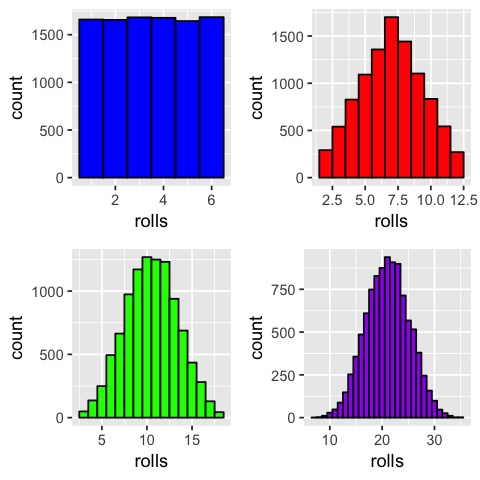

In [2]:
# -------------------------------
# Question 4
# -------------------------------
n = 10000
k = 6

for(i in 1:k){
    e = paste("dice", i, "= data.frame(rolls = ceiling(runif(n, min=0, max=6)))",sep="")
    eval(parse(text=e))
}

# a) Exp 1: 10,000 throws, 1 die
dice4a = dice1
p1 = ggplot(dice4a, aes(x=rolls)) + geom_histogram(fill='blue',color='black',binwidth=1)

# b) Exp 2: 10,000 throws, 2 dice
dice4b = dice1+dice2
p2 = ggplot(dice4b, aes(x=rolls)) + geom_histogram(fill='red',color='black',binwidth=1)

# c) Exp 3: 10,000 throws, 3 die
dice4c = dice1+dice2+dice3
p3 = ggplot(dice4c, aes(x=rolls)) + geom_histogram(fill='green',color='black',binwidth=1)

# d) Exp 4: 10,000 throws, 6 die
dice4d = dice1+dice2+dice3+dice4+dice5+dice6
p4 = ggplot(dice4d, aes(x=rolls)) + geom_histogram(fill='purple',color='black',binwidth=1)

# Plot on a 2 x 2 grid
grid.arrange(p1, p2, p3, p4, nrow = 2, ncol = 2)


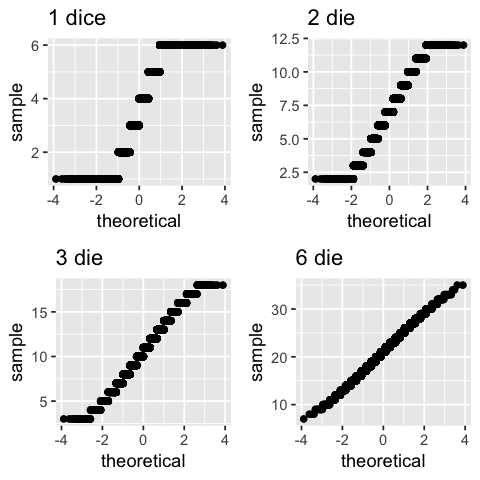

In [14]:
# Now show the Q-Q plots (we'll just use the built in q-q plots for now)

p1 = ggplot(dice4a, aes(sample=rolls)) + geom_point(stat = "qq") + ggtitle("1 dice")
p2 = ggplot(dice4b, aes(sample=rolls)) + geom_point(stat = "qq") + ggtitle("2 die")
p3 = ggplot(dice4c, aes(sample=rolls)) + geom_point(stat = "qq") + ggtitle("3 die")
p4 = ggplot(dice4d, aes(sample=rolls)) + geom_point(stat = "qq") + ggtitle("6 die")

# Plot on a 2 x 2 grid
grid.arrange(p1, p2, p3, p4, nrow = 2, ncol = 2)
